<a href="https://colab.research.google.com/github/aloksingh43/Bike_sharing_demand_prediction/blob/main/Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
url='https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=sharing' 
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [3]:
df_Bike_sharing_demand=pd.read_csv(url,encoding= 'unicode_escape')

In [4]:
df_Bike_sharing_demand.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df_Bike_sharing_demand.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
print('Shape of data is:' ,df_Bike_sharing_demand.shape)

Shape of data is: (8760, 14)


In [7]:
df_Bike_sharing_demand.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
df_Bike_sharing_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
df_Bike_sharing_demand.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [10]:
df=df_Bike_sharing_demand.copy()

In [11]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
null_values_in_data=df.isnull().sum().sort_values(ascending=False)
print(null_values_in_data)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [14]:
# we can see that data type of date is object we change it into datetime
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [16]:
len(df[df.duplicated()])

0

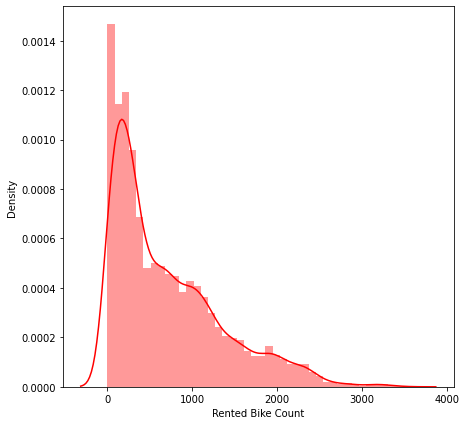

In [17]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="r");

In [18]:
df['Rented Bike Count'] = df['Rented Bike Count'].astype(float)

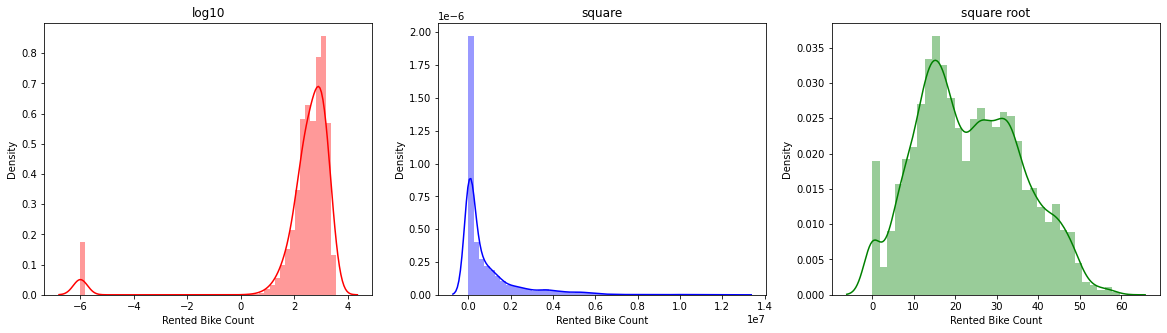

In [19]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(df['Rented Bike Count']+0.000001),ax=axes[0],color="r").set_title('log10')
sns.distplot(df['Rented Bike Count']**2,ax=axes[1],color="b").set_title('square')
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2],color="g").set_title('square root');

In [20]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

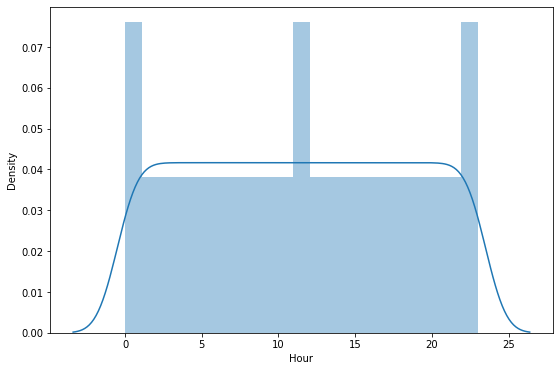

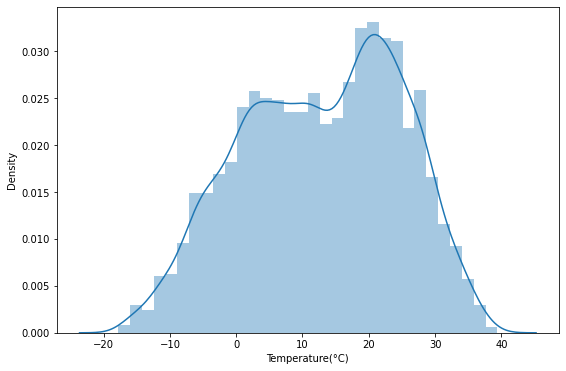

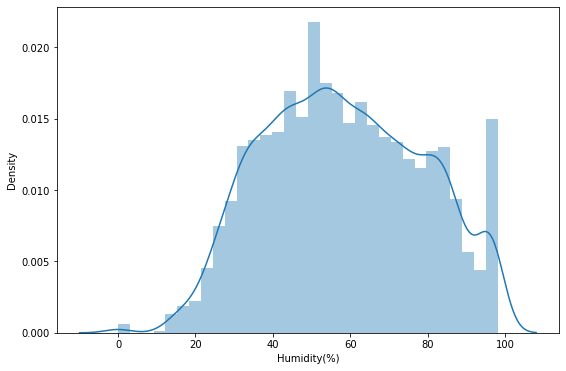

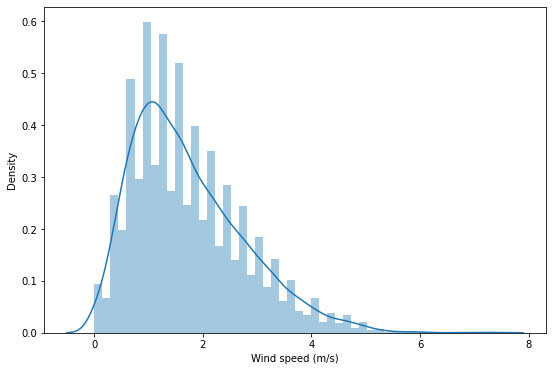

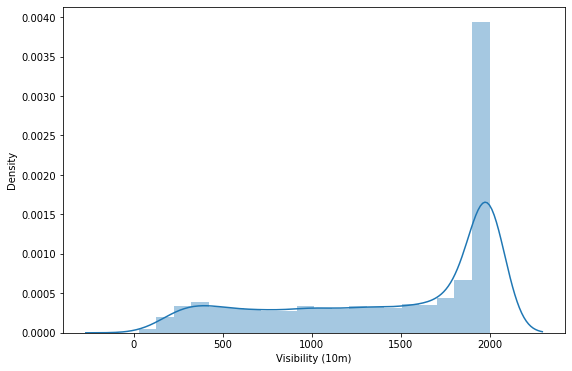

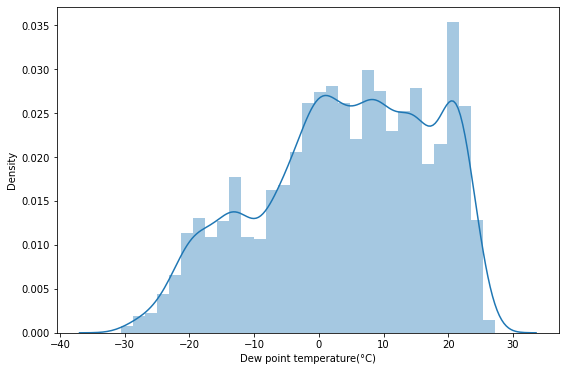

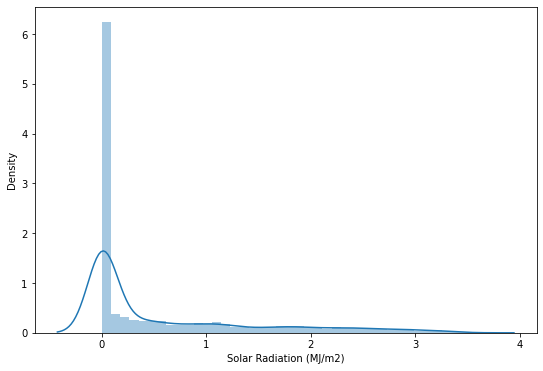

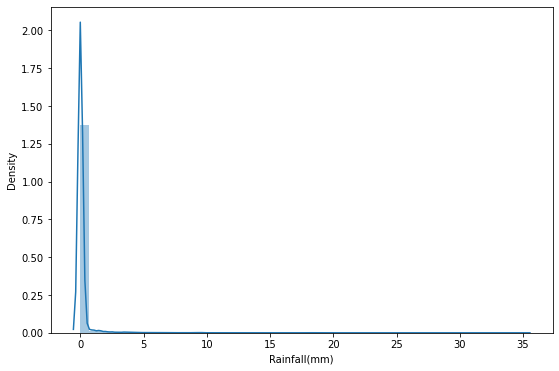

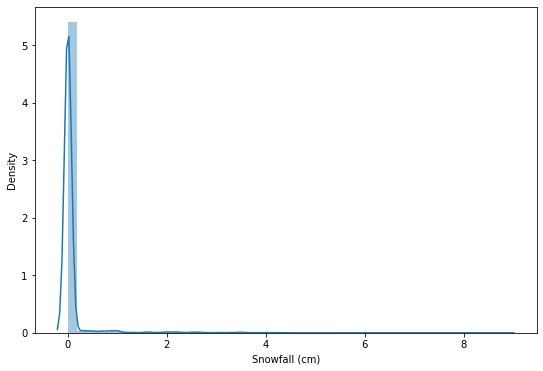

In [21]:
for col in numeric_features[:]:
  if col=="Rented Bike Count":
      pass
  else:
    fig = plt.figure(figsize=(9, 6))
    sns.distplot(df[col])

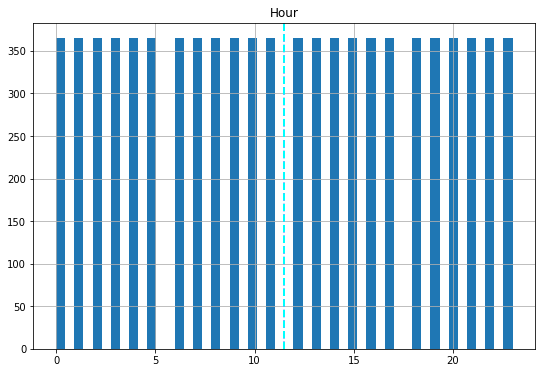

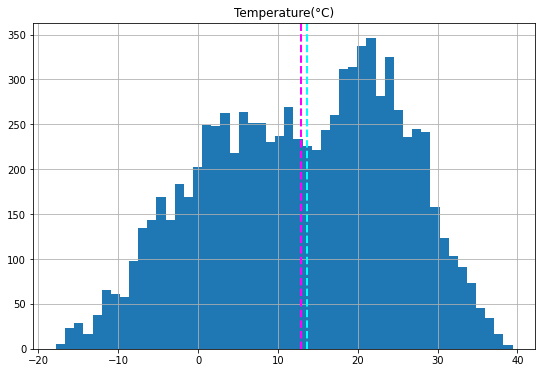

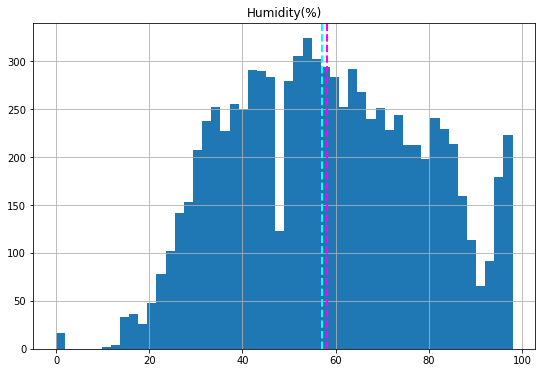

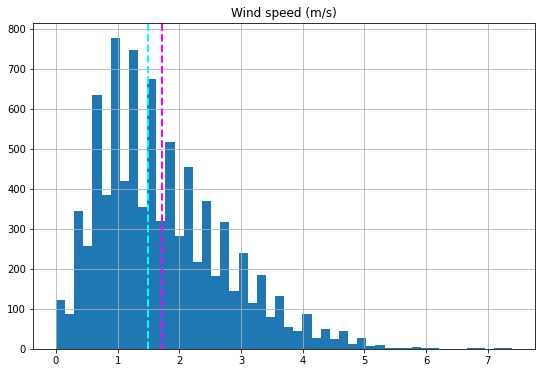

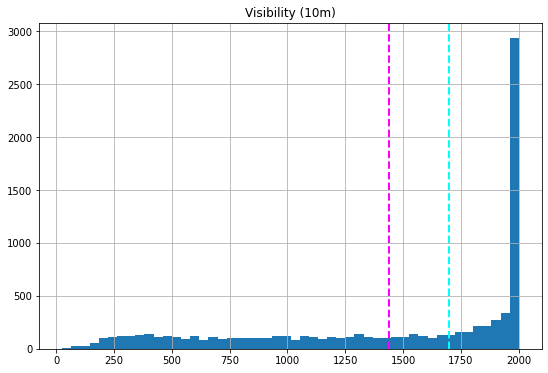

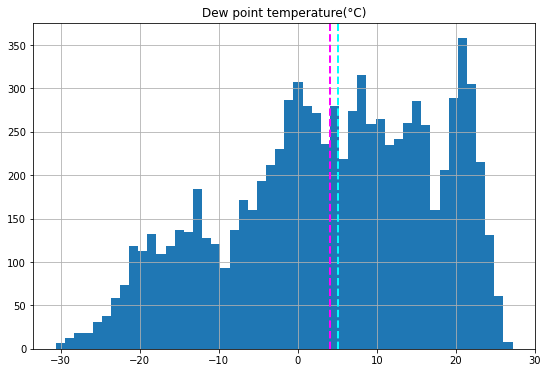

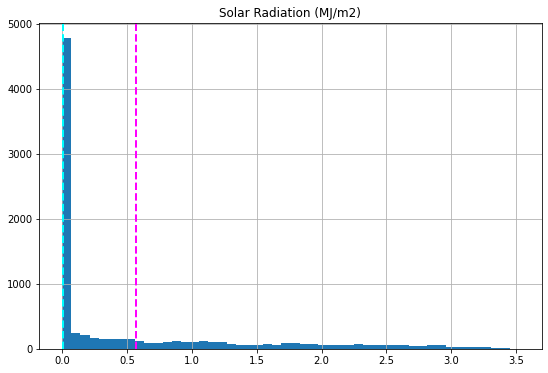

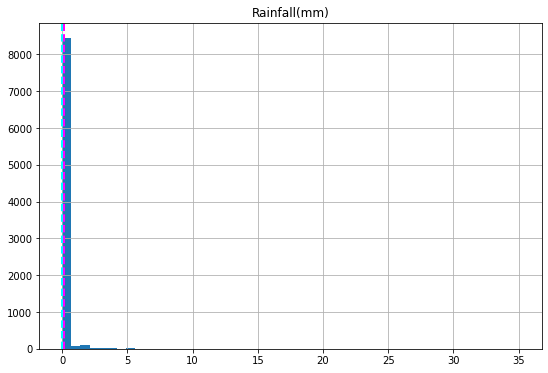

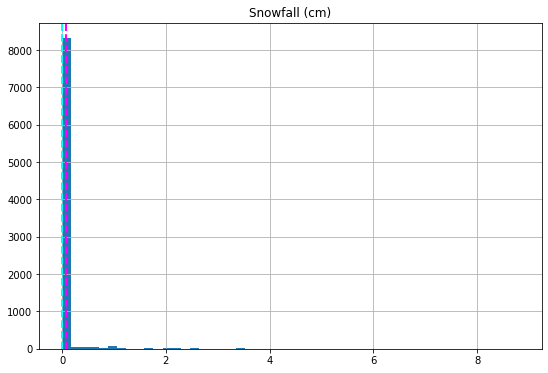

In [22]:
for col in numeric_features[:]:
  if col=='Rented Bike Count':
    pass
  else:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

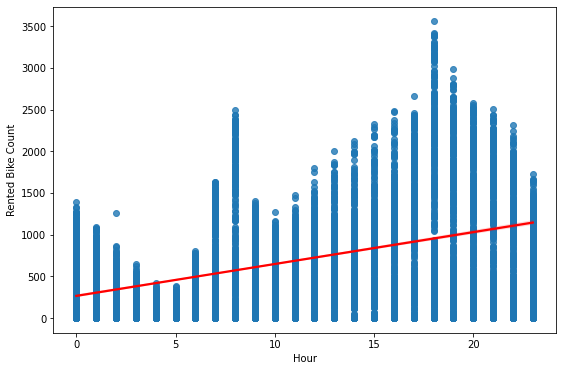

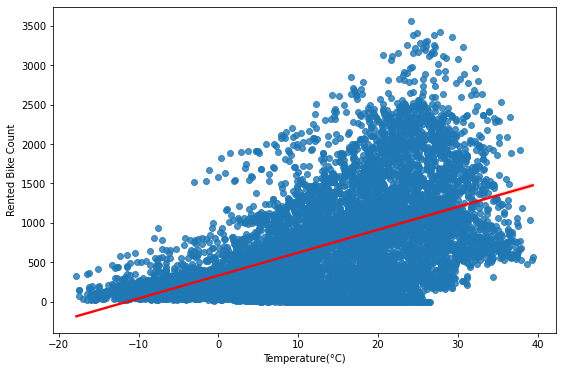

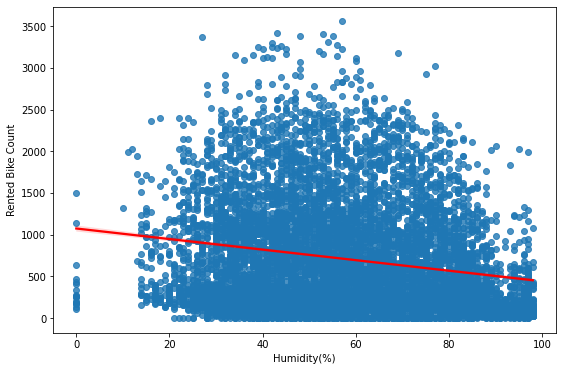

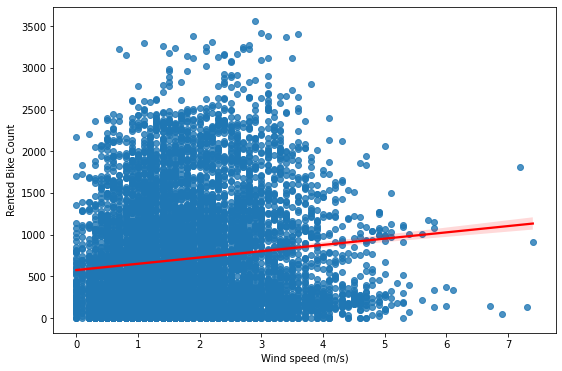

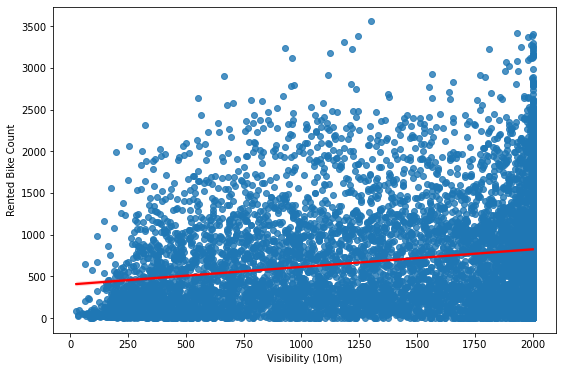

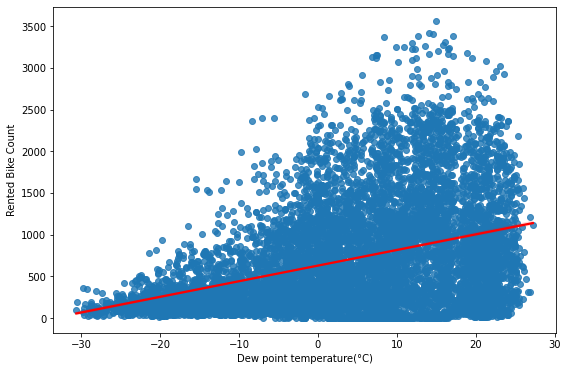

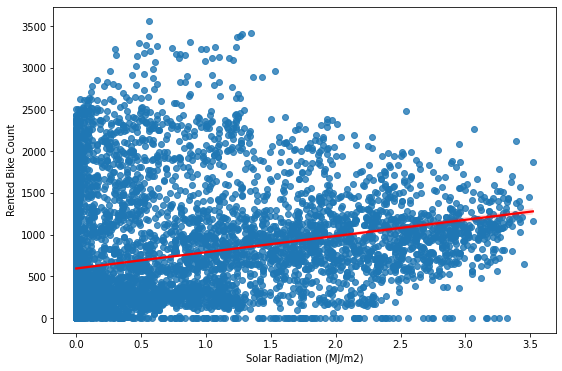

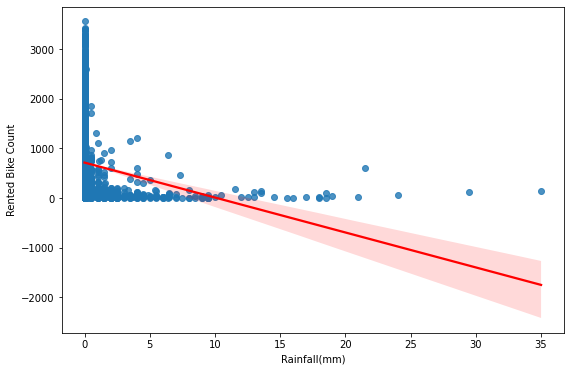

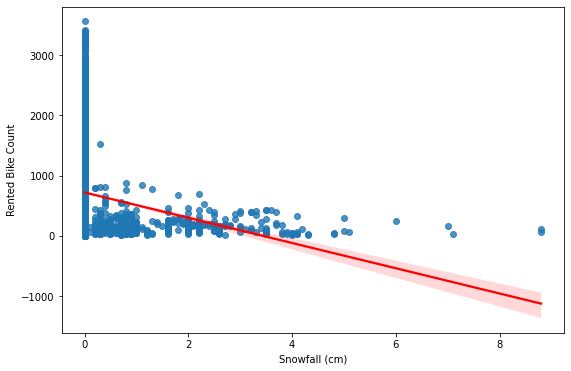

In [23]:
for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    fig = plt.figure(figsize=(9, 6))
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

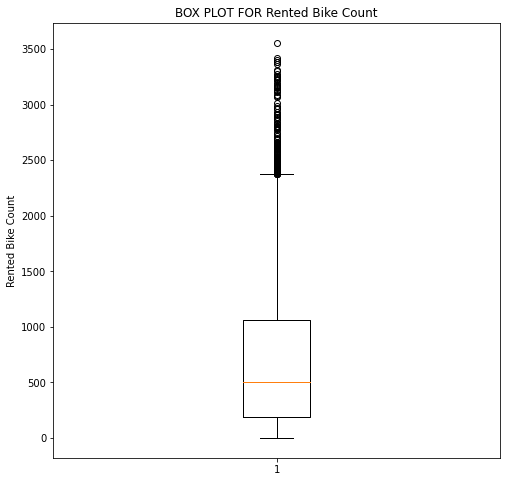

In [24]:
plt.figure(figsize=(8,8))
plt.boxplot(df['Rented Bike Count'])
plt.ylabel('Rented Bike Count')
plt.title('BOX PLOT FOR Rented Bike Count');

In [25]:
# now remove outliers from Rented Bike Count
q1_for_Rented_Bike_Count=df['Rented Bike Count'].quantile(0.25)
q3_for_Rented_Bike_Count=df['Rented Bike Count'].quantile(0.75)
print('q1_for_Rented_Bike_Count',q1_for_Rented_Bike_Count)
print('q3_for_Rented_Bike_Count',q3_for_Rented_Bike_Count)

q1_for_Rented_Bike_Count 191.0
q3_for_Rented_Bike_Count 1065.25


In [26]:
iqr_for_Rented_Bike_Count=q3_for_Rented_Bike_Count-q1_for_Rented_Bike_Count
lower_acceptable_limt=q1_for_Rented_Bike_Count-iqr_for_Rented_Bike_Count*1.5
upper_acceptable_limt=q3_for_Rented_Bike_Count+iqr_for_Rented_Bike_Count*1.5
print('lower_acceptable_limt_for_distance',lower_acceptable_limt)
print('upper_acceptable_limt_for_distance',upper_acceptable_limt)

lower_acceptable_limt_for_distance -1120.375
upper_acceptable_limt_for_distance 2376.625


In [27]:
df=df[df['Rented Bike Count']>=0]
df=df[df['Rented Bike Count']<upper_acceptable_limt]

In [28]:
df.shape

(8602, 14)

In [29]:
# let's do some feature engineering


In [30]:
df['Month'] = df.Date.dt.month_name()
df['day']=df.Date.dt.day_name()

In [31]:
df.drop(['Date'], axis=1,inplace=True)

In [32]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,day
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003.0,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8756,764.0,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8757,694.0,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8758,712.0,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday


In [33]:
no_of_bikeshare_in_season=df.groupby(['Seasons'])['Rented Bike Count'].sum().reset_index()
no_of_bikeshare_in_season


,Seasons,Rented Bike Count
0,Autumn,1692588.0
1,Spring,1523581.0
2,Summer,2042554.0
3,Winter,487169.0


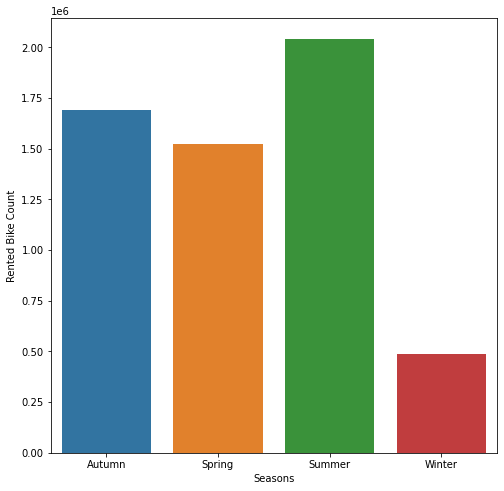

In [34]:
plt.figure(figsize=(8,8))
sns.barplot(data=no_of_bikeshare_in_season, x="Seasons", y="Rented Bike Count");

In [35]:
no_of_bikeshare_in_Holiday=df.groupby(['Holiday'])['Rented Bike Count'].sum().reset_index()
no_of_bikeshare_in_Holiday

,Holiday,Rented Bike Count
0,Holiday,213495.0
1,No Holiday,5532397.0


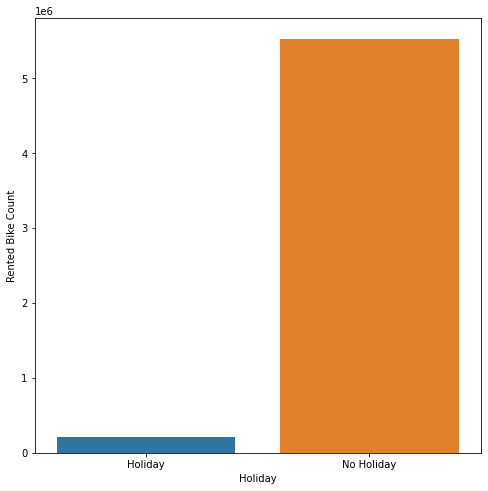

In [36]:
plt.figure(figsize=(8,8))
sns.barplot(data=no_of_bikeshare_in_Holiday, x="Holiday", y="Rented Bike Count");

In [37]:
no_of_bikeshare_in_Functioning_Day=df.groupby(['Functioning Day'])['Rented Bike Count'].sum().reset_index()
no_of_bikeshare_in_Functioning_Day

,Functioning Day,Rented Bike Count
0,No,0.0
1,Yes,5745892.0


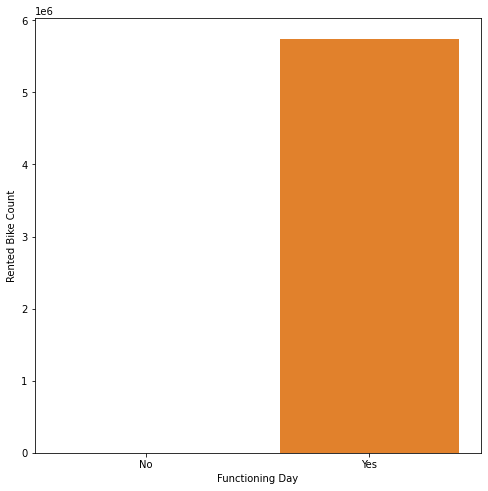

In [38]:
plt.figure(figsize=(8,8))
sns.barplot(data=no_of_bikeshare_in_Functioning_Day, x="Functioning Day", y="Rented Bike Count");

In [39]:
no_of_bikeshare_in_Month=df.groupby(['Month'])['Rented Bike Count'].mean().reset_index()
no_of_bikeshare_in_Month

,Month,Rented Bike Count
0,April,726.460882
1,August,799.347411
2,December,387.181199
3,February,390.031297
4,January,376.240216
5,July,900.356557
6,June,867.780741
7,March,595.802168
8,May,830.677330
9,November,670.944056


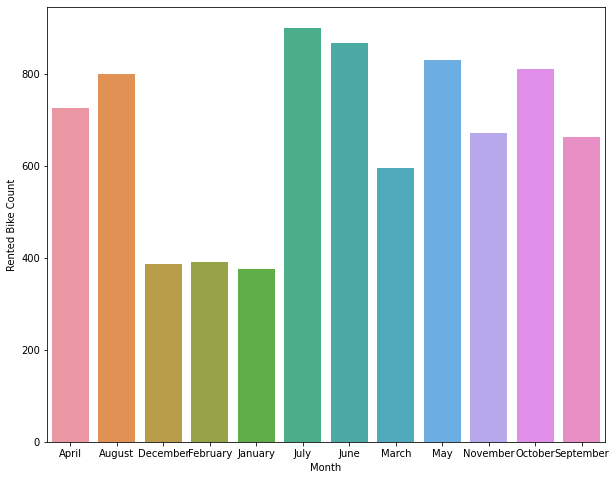

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(data=no_of_bikeshare_in_Month, x="Month", y="Rented Bike Count");

In [41]:
no_of_bikeshare_in_day=df.groupby(['day'])['Rented Bike Count'].mean().reset_index()
no_of_bikeshare_in_day

,day,Rented Bike Count
0,Friday,686.615385
1,Monday,672.642796
2,Saturday,704.110569
3,Sunday,594.847894
4,Thursday,702.695012
5,Tuesday,654.210024
6,Wednesday,665.029009


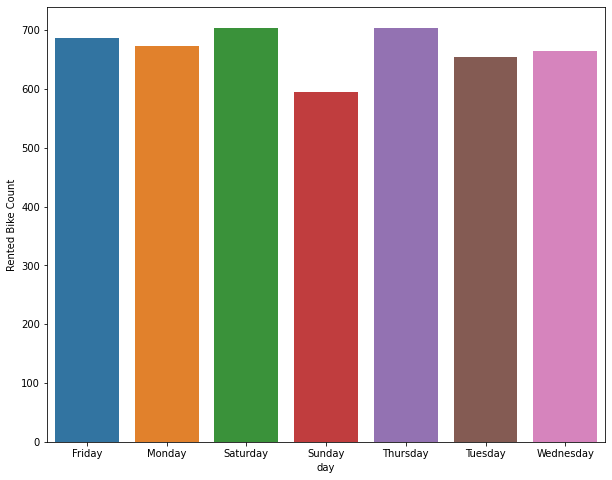

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(data=no_of_bikeshare_in_day, x="day", y="Rented Bike Count");

In [43]:
average_of_bikeshare_in_hour=df.groupby(['Hour'])['Rented Bike Count'].mean().reset_index()
average_of_bikeshare_in_hour

,Hour,Rented Bike Count
0,0,541.460274
1,1,426.183562
2,2,301.630137
3,3,203.331507
4,4,132.591781
5,5,139.082192
6,6,287.564384
7,7,606.005479
8,8,999.930748
9,9,645.983562


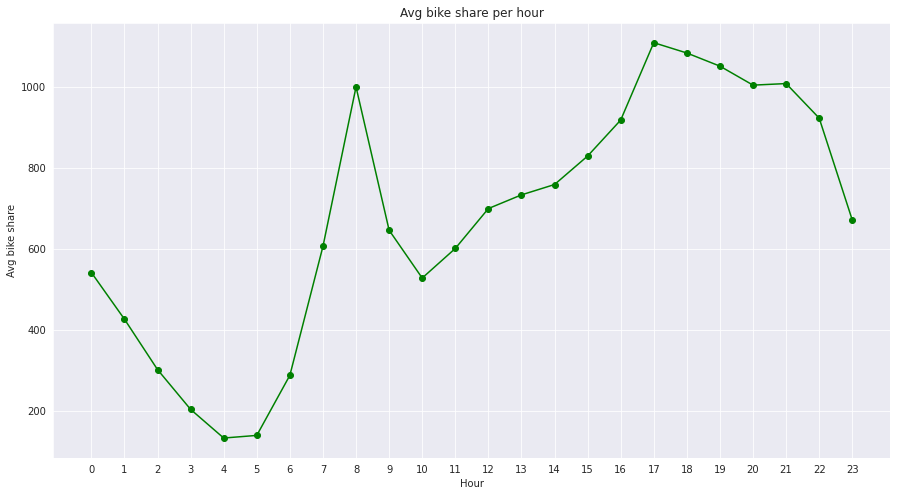

In [44]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
plt.plot(average_of_bikeshare_in_hour['Hour'],average_of_bikeshare_in_hour['Rented Bike Count'], marker='o', c='g')
plt.xlabel('Hour')
plt.ylabel('Avg bike share')
plt.title('Avg bike share per hour')
plt.xticks(average_of_bikeshare_in_hour['Hour']);

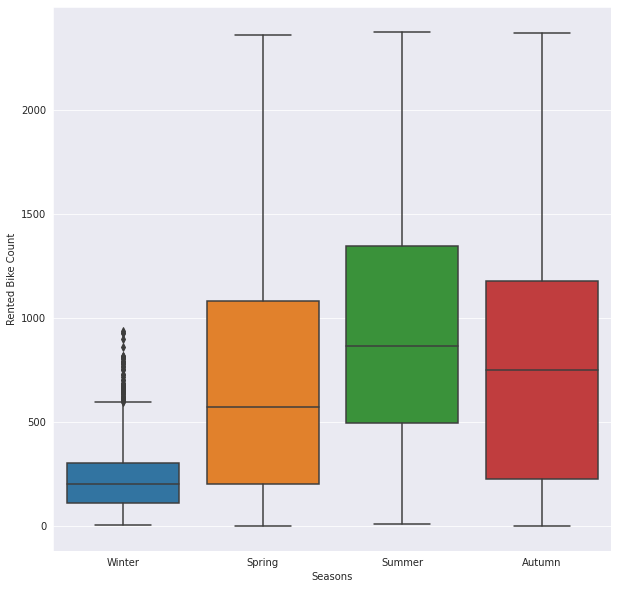

In [45]:
# plot box plot for categorical column
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="Seasons", y="Rented Bike Count");



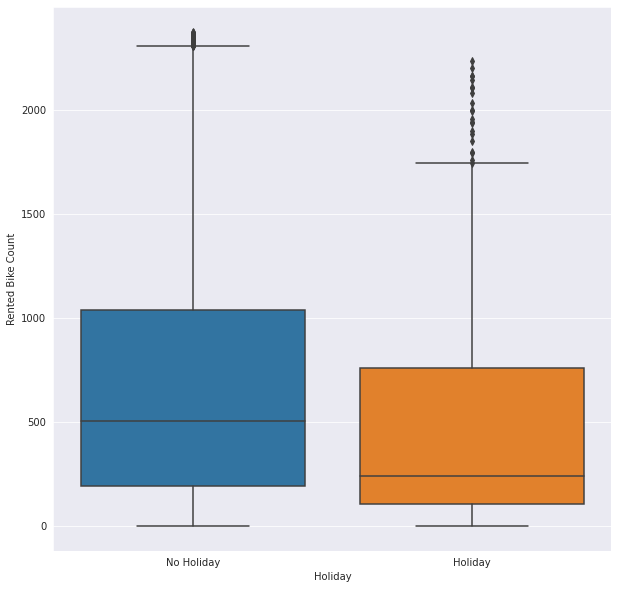

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="Holiday", y="Rented Bike Count");

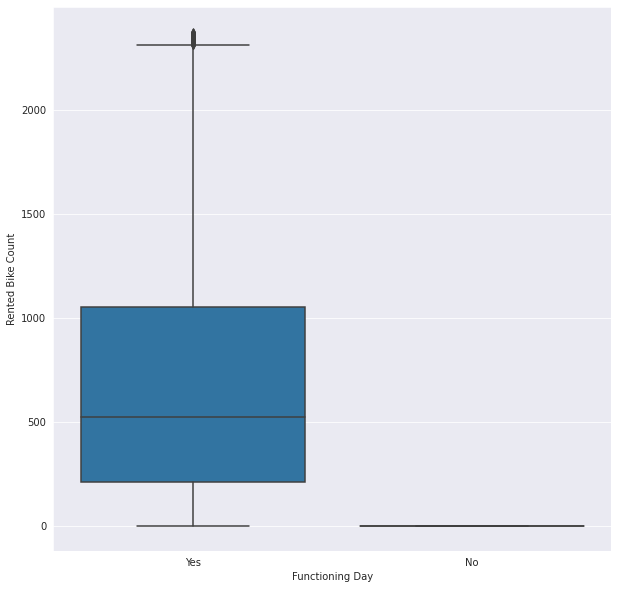

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="Functioning Day", y="Rented Bike Count");

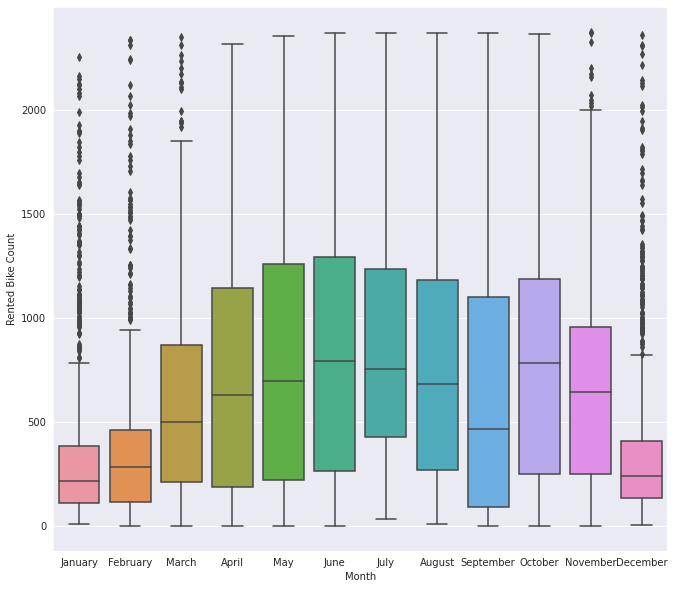

In [48]:
plt.figure(figsize=(11,10))
sns.boxplot(data=df, x="Month", y="Rented Bike Count");

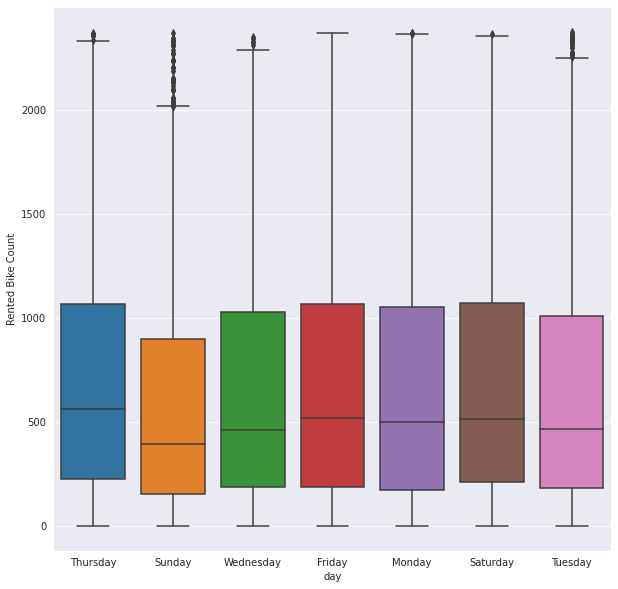

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="day", y="Rented Bike Count");

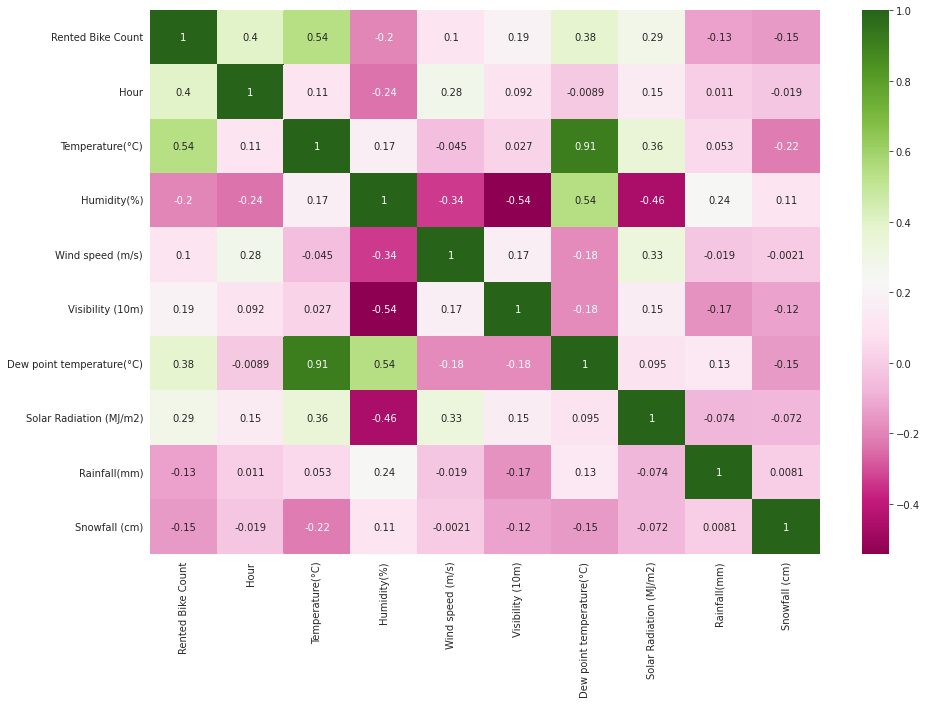

In [50]:

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True);

In [51]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [52]:
# removing multicollear
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.832560
1,Temperature(°C),3.206499
2,Humidity(%),4.918005
3,Wind speed (m/s),4.565549
4,Visibility (10m),4.647583
5,Solar Radiation (MJ/m2),2.271268
6,Rainfall(mm),1.079814
7,Snowfall (cm),1.121610


In [53]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [54]:
df.corr()['Rented Bike Count']

Rented Bike Count          1.000000
Hour                       0.396070
Temperature(°C)            0.539483
Humidity(%)               -0.196393
Wind speed (m/s)           0.104367
Visibility (10m)           0.193498
Solar Radiation (MJ/m2)    0.286884
Rainfall(mm)              -0.127669
Snowfall (cm)             -0.145819
Name: Rented Bike Count, dtype: float64

In [55]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'Month', 'day'], dtype='object')

In [56]:
### Data encoding
#label encoding
encoders_nums = {"Holiday":{"Holiday":0,"No Holiday":1},
                 "Functioning Day":{"Yes":1,"No":0}
                 }

df= df.replace(encoders_nums)

In [57]:
df = pd.get_dummies(df, columns=["Seasons", "Month","day"])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 0 to 8759
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8602 non-null   float64
 1   Hour                     8602 non-null   int64  
 2   Temperature(°C)          8602 non-null   float64
 3   Humidity(%)              8602 non-null   int64  
 4   Wind speed (m/s)         8602 non-null   float64
 5   Visibility (10m)         8602 non-null   int64  
 6   Solar Radiation (MJ/m2)  8602 non-null   float64
 7   Rainfall(mm)             8602 non-null   float64
 8   Snowfall (cm)            8602 non-null   float64
 9   Holiday                  8602 non-null   int64  
 10  Functioning Day          8602 non-null   int64  
 11  Seasons_Autumn           8602 non-null   uint8  
 12  Seasons_Spring           8602 non-null   uint8  
 13  Seasons_Summer           8602 non-null   uint8  
 14  Seasons_Winter          

In [59]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Month_November,Month_October,Month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,254.0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
1,204.0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
2,173.0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
3,107.0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
4,78.0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003.0,19,4.2,34,2.6,1894,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
8756,764.0,20,3.4,37,2.3,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
8757,694.0,21,2.6,39,0.3,1968,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
8758,712.0,22,2.1,41,1.0,1859,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0


In [60]:
print(df.corr())

                         Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                 1.000000  0.396070         0.539483   
Hour                              0.396070  1.000000         0.109085   
Temperature(°C)                   0.539483  0.109085         1.000000   
Humidity(%)                      -0.196393 -0.237844         0.168346   
Wind speed (m/s)                  0.104367  0.281044        -0.044907   
Visibility (10m)                  0.193498  0.092095         0.027307   
Solar Radiation (MJ/m2)           0.286884  0.147481         0.356291   
Rainfall(mm)                     -0.127669  0.011149         0.053082   
Snowfall (cm)                    -0.145819 -0.018643        -0.217566   
Holiday                           0.067252 -0.003654         0.053026   
Functioning Day                   0.213525  0.002146        -0.053958   
Seasons_Autumn                    0.117443  0.001356         0.064189   
Seasons_Spring                    0.032096  0.00203

In [61]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [62]:
# independent variable 
features=df.columns[1:]
features

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Month_April',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [63]:
len(features)

33

In [64]:
from scipy.stats import zscore
X = df[features].apply(zscore)

In [65]:
y=np.sqrt(df['Rented Bike Count'])

In [66]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6881, 33)
(1721, 33)


In [67]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,...,Month_November,Month_October,Month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
420,0.090004,-1.212585,1.204025,-0.497091,-1.771691,-0.547590,0.833370,11.401767,0.229668,0.188447,...,-0.301091,-0.30475,-0.299711,-0.401859,2.516611,-0.408470,-0.418493,-0.407113,-0.413687,-0.410599
5489,0.812492,1.602141,-0.311575,0.658657,0.009868,1.557138,-0.133016,-0.173510,0.229668,0.188447,...,-0.301091,-0.30475,-0.299711,-0.401859,-0.397360,-0.408470,-0.418493,-0.407113,2.417287,-0.410599
5639,1.679477,1.451353,-0.018233,-0.111842,0.930969,-0.650539,-0.133016,-0.173510,0.229668,0.188447,...,-0.301091,-0.30475,-0.299711,-0.401859,2.516611,-0.408470,-0.418493,-0.407113,-0.413687,-0.410599
8136,-1.643965,-0.215703,0.812903,-1.652839,-0.835840,-0.650539,-0.133016,-0.173510,0.229668,0.188447,...,-0.301091,-0.30475,-0.299711,2.488435,-0.397360,-0.408470,-0.418493,-0.407113,-0.413687,-0.410599
6935,1.679477,0.856574,1.106245,-0.786028,0.193433,-0.650539,-0.133016,-0.173510,0.229668,0.188447,...,-0.301091,-0.30475,3.336552,-0.401859,-0.397360,2.448162,-0.418493,-0.407113,-0.413687,-0.410599


In [68]:
X_test.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,...,Month_November,Month_October,Month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
4248,-1.643965,0.622014,0.323999,-0.111842,-0.549020,-0.650539,-0.133016,-0.173510,0.229668,0.188447,...,-0.301091,-0.304750,-0.299711,-0.401859,-0.397360,-0.40847,2.389525,-0.407113,-0.413687,-0.410599
3154,-0.198991,0.052367,-0.360465,2.295966,0.090178,1.831668,-0.133016,-0.173510,0.229668,-5.306536,...,3.321260,-0.304750,-0.299711,-0.401859,-0.397360,-0.40847,2.389525,-0.407113,-0.413687,-0.410599
140,1.245984,-0.961270,1.741819,-1.074965,-1.973285,-0.650539,-0.133016,2.096153,0.229668,0.188447,...,-0.301091,-0.304750,-0.299711,-0.401859,2.516611,-0.40847,-0.418493,-0.407113,-0.413687,-0.410599
6375,0.523497,1.618896,-0.262685,0.369720,0.917857,1.145343,-0.133016,-0.173510,0.229668,0.188447,...,-0.301091,-0.304750,-0.299711,-0.401859,-0.397360,-0.40847,-0.418493,2.456323,-0.413687,-0.410599
7654,1.534979,0.178024,1.204025,-0.208154,-1.974924,-0.650539,-0.133016,-0.173510,0.229668,0.188447,...,-0.301091,3.281378,-0.299711,-0.401859,2.516611,-0.40847,-0.418493,-0.407113,-0.413687,-0.410599


In [69]:
y_train.head()

420      7.874008
5489    39.887341
5639    34.014703
8136    22.803509
6935    34.785054
Name: Rented Bike Count, dtype: float64

In [70]:
y_test.head()

4248    33.000000
3154     0.000000
140     13.784049
6375    28.930952
7654    37.107951
Name: Rented Bike Count, dtype: float64

In [71]:
print('Shape of X_train is -' , X_train.shape)
print('Shape of X_test is -' , X_test.shape)
print('Shape of y_train is -' , y_train.shape)
print('Shape of y_test is - ', y_test.shape)

Shape of X_train is - (6881, 33)
Shape of X_test is - (1721, 33)
Shape of y_train is - (6881,)
Shape of y_test is -  (1721,)


In [72]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [73]:

reg.score(X_train, y_train)

0.6557832565499859

In [74]:
reg.coef_

array([ 3.21821004e+00,  5.79332562e+00, -3.10627242e+00, -3.21587349e-02,
        2.24679432e-01, -5.84166183e-01, -1.66472264e+00,  4.26162703e-02,
        4.90630430e-01,  4.97549414e+00, -7.92157517e+12, -7.95451507e+12,
       -7.88557593e+12, -7.93628334e+12, -4.09195211e+11, -4.17298696e+11,
       -4.17298696e+11, -4.00582578e+11, -4.19097263e+11, -4.16782744e+11,
       -4.01673461e+11, -4.18327828e+11, -4.13406243e+11, -4.12359272e+11,
       -4.16524419e+11, -4.10781609e+11, -6.64213920e+11, -6.58816875e+11,
       -6.72040968e+11, -6.83675603e+11, -6.70444007e+11, -6.78131734e+11,
       -6.74535528e+11])

In [75]:
reg.intercept_

22.93869528101536

In [76]:
y_pred = reg.predict(X_test)

In [77]:
y_pred

array([22.06662497, -3.46071878, 16.85764059, ..., 18.63937887,
       21.21506247, 37.55356345])

In [78]:
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 128568.68264683452
RMSE : 358.56475377096746


In [79]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6180382397136305
Adjusted R2 :  0.610566551456695


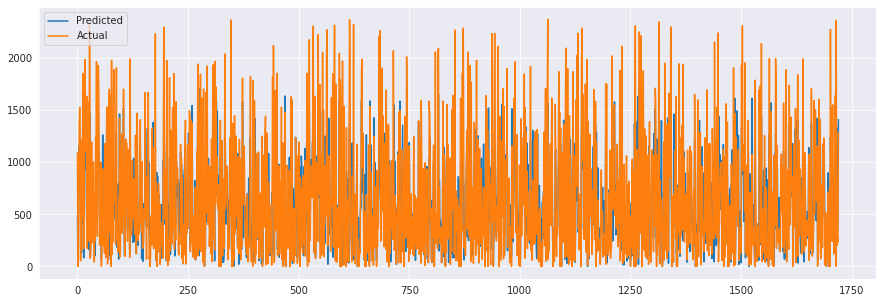

In [80]:
plt.figure(figsize=(15,5))
plt.plot((y_pred)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [81]:
from sklearn.linear_model import Lasso
lasso_1  = Lasso(alpha=0.001 , max_iter= 3000)
lasso_1.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [82]:
lasso_1.score(X_train, y_train)

0.655783820662396

In [83]:
lasso_1.coef_

array([ 3.22077725e+00,  5.78502155e+00, -3.10804242e+00, -3.34582730e-02,
        2.20612457e-01, -5.81153214e-01, -1.66430102e+00,  3.93457424e-02,
        4.88845565e-01,  4.97485360e+00,  1.58327398e+00,  4.51334000e-01,
       -0.00000000e+00, -1.37754902e+00, -6.59173207e-02, -2.85109029e-01,
        1.38332589e-01, -3.04629993e-01, -1.86988446e-01, -9.69500421e-02,
        8.74075921e-01,  6.07265812e-05,  1.97610850e-01,  1.16735378e-01,
        4.29168071e-01, -1.22904443e-01,  1.60366372e-01, -9.26310685e-03,
        1.60955334e-02, -3.35104025e-01,  0.00000000e+00, -8.15575447e-02,
        1.02299043e-01])

In [84]:
y_pred_lasso_1 = lasso_1.predict(X_test)

In [85]:
MSE  = mean_squared_error((y_test)**2, (y_pred_lasso_1)**2)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 128558.16953792816
RMSE : 358.55009348475727


In [86]:
r2 = r2_score((y_test)**2, (y_pred_lasso_1)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_lasso_1)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6180694728685582
Adjusted R2 :  0.610598395574345


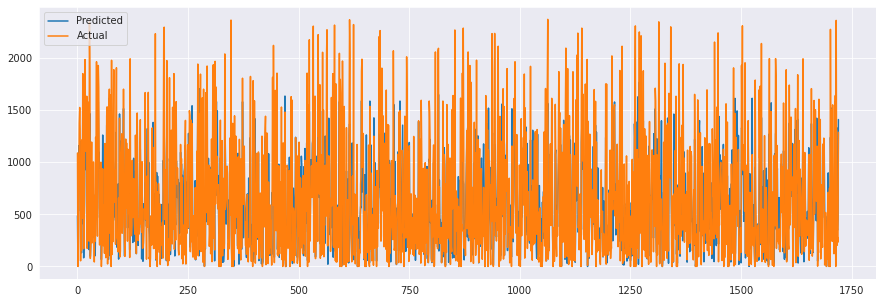

In [87]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_lasso_1)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [88]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [89]:
print('the best fit alpha value is -',lasso_regressor.best_params_)

the best fit alpha value is - {'alpha': 0.01}


In [90]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [91]:
MSE  = mean_squared_error((y_test)**2, (y_pred_lasso)**2)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 128649.99446513821
RMSE : 358.6781209735802


In [92]:
r2 = r2_score((y_test)**2, (y_pred_lasso)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_lasso)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6177966722913627
Adjusted R2 :  0.6103202586491665


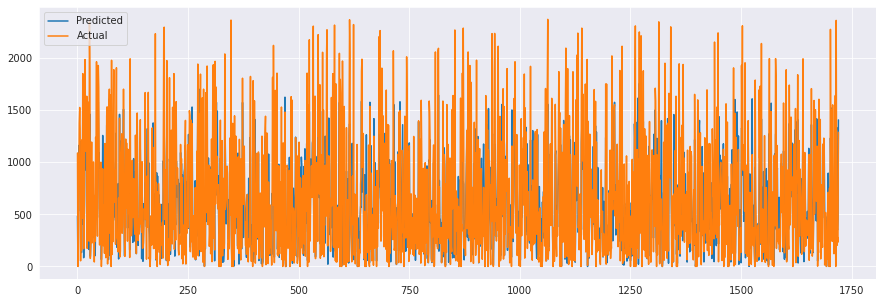

In [93]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_lasso)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [94]:
from sklearn.linear_model import Ridge
ridge_1 = Ridge (alpha= 0.1)
ridge_1.fit(X_train,y_train)

Ridge(alpha=0.1)

In [95]:
ridge_1.score(X_train, y_train)

0.6557841300393693

In [96]:
ridge_1.coef_

array([ 3.22088777,  5.79384083, -3.11073163, -0.03486183,  0.22212385,
       -0.58507411, -1.66473145,  0.04114473,  0.48989113,  4.97573883,
        1.41909393,  0.28824596, -0.16762198, -1.53882109, -0.12354339,
       -0.34321279,  0.08236581, -0.36049482, -0.24497934, -0.15517603,
        0.82101422, -0.05634378,  0.14084491,  0.06172756,  0.37321201,
       -0.18059278,  0.18314743,  0.01169957,  0.03914531, -0.31350955,
        0.02184277, -0.0600767 ,  0.12567194])

In [97]:
y_pred_ridge_1 = ridge_1.predict(X_test)

In [98]:
MSE  = mean_squared_error((y_test)**2, (y_pred_ridge_1)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 128549.52567844509
RMSE : 358.53803937440875


In [99]:
r2 = r2_score((y_test)**2, (y_pred_ridge_1)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_ridge_1)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6180951527131039
Adjusted R2 :  0.6106245777513567


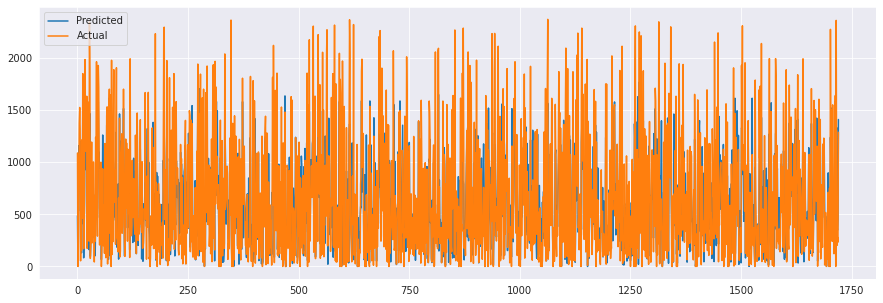

In [100]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_ridge_1)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [101]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [102]:
print('the best fit alpha value is -',ridge_regressor.best_params_)

the best fit alpha value is - {'alpha': 20}


In [103]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [104]:
MSE  = mean_squared_error((y_test)**2, (y_pred_ridge)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 128660.57381997751
RMSE : 358.6928683706682


In [105]:
r2 = r2_score((y_test)**2, (y_pred_ridge)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_ridge)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6177652423279072
Adjusted R2 :  0.6102882138731478


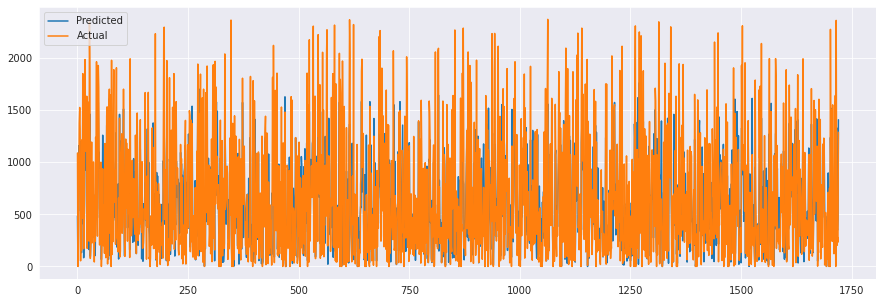

In [106]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_ridge)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [107]:
from sklearn.linear_model import ElasticNet
elasticnet_1 = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [108]:
elasticnet_1.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [109]:
elasticnet_1.score(X_train, y_train)

0.6518833260338333

In [110]:
elasticnet_1.coef_

array([ 3.17504097,  4.62383231, -2.58763981, -0.        ,  0.31432486,
       -0.01867009, -1.5899392 , -0.01505414,  0.4014043 ,  4.63466241,
        1.11709161, -0.        ,  0.01691276, -2.08110978, -0.        ,
       -0.20350939,  0.0135843 , -0.26163357, -0.19622354, -0.        ,
        0.71946145, -0.        ,  0.23499998,  0.02926662,  0.36382709,
       -0.06969522,  0.10192991, -0.        ,  0.        , -0.28510119,
        0.        , -0.05106977,  0.02704896])

In [111]:
y_pred_elasticnet_1 = elasticnet_1.predict(X_test)

In [112]:
MSE  = mean_squared_error((y_test)**2, (y_pred_elasticnet_1)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 132695.8211854582
RMSE : 364.2743762405725


In [113]:
r2 = r2_score((y_test)**2, (y_pred_elasticnet_1)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_elasticnet_1)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6057770181727
Adjusted R2 :  0.5980654838512414


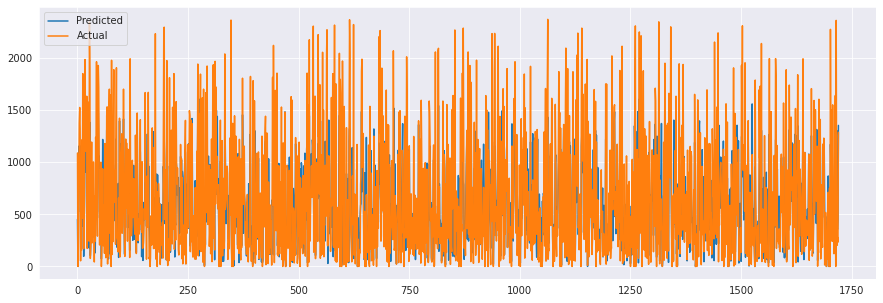

In [114]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_elasticnet_1)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [115]:
elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elasticnet_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)

In [116]:
elasticnet_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [117]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elasticnet_model.best_params_['alpha'], elasticnet_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", elasticnet_model.best_score_)

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -49.76742487857617


In [118]:
y_pred_elasticnet = elasticnet_model.predict(X_test)

In [119]:
MSE  = mean_squared_error((y_test)**2, (y_pred_elasticnet)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 128649.99446513821
RMSE : 358.6781209735802


In [120]:
r2 = r2_score((y_test)**2, (y_pred_elasticnet)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_elasticnet)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6177966722913627
Adjusted R2 :  0.6103202586491665


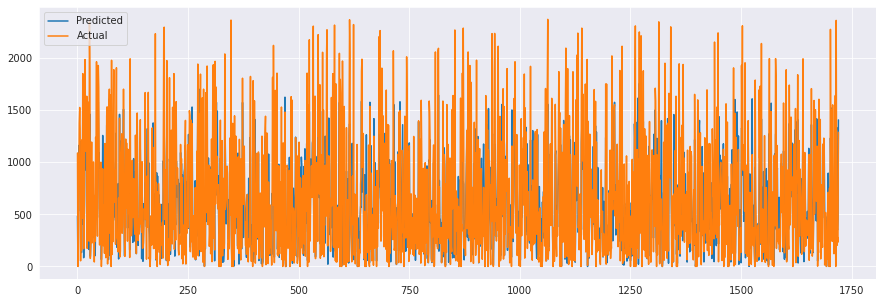

In [121]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_elasticnet)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
# Maximum trees depth
max_depth = [4,6,8,10]
 
# Minimum number of samples required to split a node
min_samples_split = [10,20,30]
 
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]

In [124]:
# Hyperparameter Grid
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [125]:
# Decision Tree Regressor

dtr = DecisionTreeRegressor()

In [126]:
# Using GridSearchCV ()
dtr_grid = GridSearchCV(estimator=dtr, param_grid = param_dict_dt,verbose=2, cv = 5, scoring='r2')

#Fitting the train value
dtr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=30; total time=   0.0s
[CV] END max_depth=4, min

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [8, 16, 22],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [127]:
dtr_grid.best_score_

0.8496275948192455

In [128]:
dtr_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=10)

In [129]:
y_dtr_test_pred = dtr_grid.predict(X_test)

In [130]:
MSE  = mean_squared_error((y_test)**2, (y_dtr_test_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 64032.158481214574
RMSE : 253.0457636104872


In [131]:
r2 = r2_score((y_test)**2, (y_dtr_test_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_dtr_test_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8097683240979938
Adjusted R2 :  0.8060471354170418


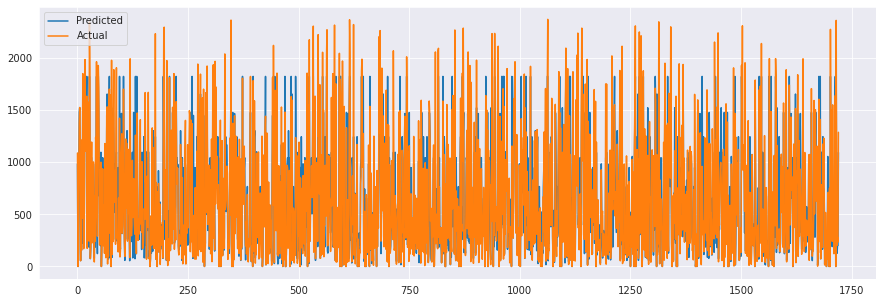

In [132]:
plt.figure(figsize=(15,5))
plt.plot((y_dtr_test_pred)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [133]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [134]:
rf = RandomForestRegressor()

In [135]:
# Hyperparameter Tuning
grid_values = {'n_estimators':[20,40,80],
               'max_depth':[4,6,8,10],
               }
rf_class = GridSearchCV(rf, param_grid = grid_values,verbose=2, scoring = 'r2', cv=5)

In [136]:
# Fit the object to train dataset
rf_class.fit (X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .......................max_depth=4, n_estimators=20; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=20; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=20; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=20; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=20; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=40; total time=   0.4s
[CV] END .......................max_depth=4, n_estimators=40; total time=   0.4s
[CV] END .......................max_depth=4, n_estimators=40; total time=   0.4s
[CV] END .......................max_depth=4, n_estimators=40; total time=   0.4s
[CV] END .......................max_depth=4, n_estimators=40; total time=   0.4s
[CV] END .......................max_depth=4, n_estimators=80; total time=   0.7s
[CV] END .......................max_depth=4, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'n_estimators': [20, 40, 80]},
             scoring='r2', verbose=2)

In [142]:
rf_class.best_score_

0.8860910149008181

In [143]:
rf_class.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=80)

In [144]:
y_rf_test_pred = rf_class.predict(X_test)

In [145]:
MSE  = mean_squared_error((y_test)**2, (y_rf_test_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 51225.89887096636
RMSE : 226.33139170465586


In [146]:
r2 = r2_score((y_test)**2, (y_rf_test_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_rf_test_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8478141480320472
Adjusted R2 :  0.844837187086616


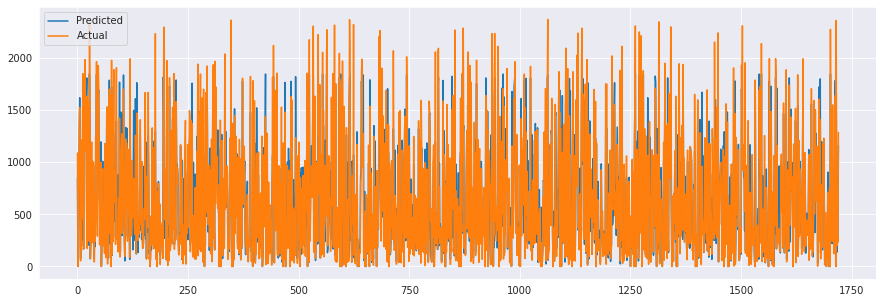

In [147]:
plt.figure(figsize=(15,5))
plt.plot((y_rf_test_pred)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [151]:
# Importing library
import xgboost as xgb

In [152]:
# XGbooster
xgb_model = xgb.XGBRegressor()

In [153]:
# Finding the tree depth
n_estimators = [80,150,200]
 
# Maximum tree depth
max_depth = [5,8,10]
min_samples_split = [40,50]
learning_rate=[0.2,0.4,0.6]

In [154]:
# Hyperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_' : min_samples_split,
             'learning_rate' : learning_rate
             }

In [155]:
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid =param_xgb, cv = 3, verbose=2, scoring="r2")

In [156]:
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[10:19:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.2, max_depth=5, min_samples_=40, n_estimators=80; total time=   0.7s
[10:19:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.2, max_depth=5, min_samples_=40, n_estimators=80; total time=   0.6s
[10:19:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.2, max_depth=5, min_samples_=40, n_estimators=80; total time=   0.6s
[10:19:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.2, max_depth=5, min_samples_=40, n_estimators=150; total time=   1.2s
[10:19:24] WARNING: /workspace/src/objective/regressi

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'max_depth': [5, 8, 10], 'min_samples_': [40, 50],
                         'n_estimators': [80, 150, 200]},
             scoring='r2', verbose=2)

In [157]:
xgb_grid.best_score_

0.9209002280182513